In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Homework 4

## Problem 1

The given empirical risk function can be rewritten in its matrix form

$$
\begin{alignat*}{2}
\hat{R}(\mathbf{\theta}) &= \frac{1}{n}(\mathbf{X} \mathbf{\theta} - \mathbf{y})^2 \\
&= \frac{1}{n} (\mathbf{X} \mathbf{\theta} - \mathbf{y})^{\top} (\mathbf{X} \mathbf{\theta} - \mathbf{y}) \\
&= \frac{1}{n} (\mathbf{\theta}^{\top} \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta} - 2 \mathbf{y}^{\top} \mathbf{X} \mathbf{\theta} + \mathbf{y}^{\top} \mathbf{y}) ,
\end{alignat*}
$$

we can compute the gradient of $\hat{R}$ as follows

$$
\triangledown \hat{R} (\mathbf{\theta}) = \frac{1}{n} (2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta} - 2 \mathbf{y}^{\top} \mathbf{X}),
$$

for the optimal $\mathbf{\theta}$, denoted as $\mathbf{\theta}^*$, the gradient should be 0, thus we have

$$
\begin{equation}
2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^* = 2 \mathbf{y}^{\top} \mathbf{X}.
\end{equation}
$$

For gradient descent, we have the following equation

$$
\begin{alignat*}{2}
\mathbf{\theta}^{k+1} - \mathbf{\theta}^* &= \mathbf{\theta}^{k} - \alpha \triangledown \hat{R}(\mathbf{\theta}^{k}) - \mathbf{\theta}^* \\
&= \mathbf{\theta}^{k} - \frac{\alpha}{n} (2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^{k} - 2 \mathbf{y}^{\top} \mathbf{X}) - \mathbf{\theta}^*.
\end{alignat*}
$$

According to eq. (1), we have:

$$
\begin{alignat*}{2}
\mathbf{\theta}^{k+1} - \mathbf{\theta}^* &= \mathbf{\theta}^{k} - \frac{\alpha}{n} (2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^{k} - 2 \mathbf{X}^{\top} \mathbf{X} \mathbf{\theta}^*) - \mathbf{\theta}^* \\
& = \left(\mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X}\right) \left( \mathbf{\theta}^{k} - \mathbf{\theta}^* \right),
\end{alignat*}
$$

so the following inequality holds:

$$
\left\| \mathbf{\theta}^{k+1} - \mathbf{\theta}^* \right\|_2 \le \left\| \mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X} \right\| \left\| \mathbf{\theta}^{k} - \mathbf{\theta}^* \right\|_2.
$$

A good choice of $\alpha$ should minimize the term $\left\| \mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X} \right\|$. We can justify that $\mathbf{X}^{\top} \mathbf{X}$ is symmetic and positive definite, thus the eigenvalues and singluar values of the matrix are identical.

Now we perform singular value decomposition on $\mathbf{X} \in \mathbb{R}^{n \times d}$, the resulted sinlugar values are denoted by $\mathbf{\Sigma} = [\sigma_1,, \cdots, \sigma_d]$, with which we have the singluar values of $\mathbf{X}^{\top} \mathbf{X}$ can be intepreted as $[\sigma_1^2,, \cdots, \sigma_d^2]$.

If we choose the optimal $\alpha$, the following equation holds

$$
\left\| \mathbf{I} - \frac{2 \alpha}{n} \mathbf{X}^{\top} \mathbf{X} \right\| = \text{max}\left( \frac{2 \alpha}{n} \sigma_1^2 -1, 1 - \frac{2 \alpha}{n} \sigma_d^2 \right),
$$

the right hand side is minimized by $\frac{2 \alpha}{n} = \frac{2}{\sigma_1 + \sigma_d}$, which means, a good choice of $\alpha$ is given by

$$
\alpha^* = \frac{n}{\sigma_1^2 + \sigma_d^2}.
$$

## Problem 2

### 1

By definition, for a convex function, given $\lambda \in (0, 1)$ and 2 arbitrary points $\mathbf{x}_1, \mathbf{x}_2 \in \mathbb{R}^n$, the following inequality holds

$$
\lambda f(\mathbf{x}_1) +(1 - \lambda) f(\mathbf{x}_2) \ge f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2).
$$

For the given function, we have

$$
\begin{alignat*}{2}
\lambda f(\mathbf{x}_1) +(1 - \lambda) f(\mathbf{x}_2) &= \lambda \left\| \mathbf{x}_1 - \mathbf{b} \right\|_2 + (1 - \lambda) \left\| \mathbf{x}_2 - \mathbf{b} \right\|_2, \\
f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2) &= \left\| \lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2 - \mathbf{b} \right\|_2.
\end{alignat*}
$$

The second equation can be rewritten as

$$
\begin{alignat*}{2}
f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2) &=  \left\| \lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2 - \lambda \mathbf{b} - (1 - \lambda) \mathbf{b}\right\|_2 \\
&= \left\| \lambda (\mathbf{x}_1 - b) + (1 - \lambda) (\mathbf{x}_2 - b) \right\|_2,
\end{alignat*}
$$

according to triangle inequality, we have

$$
\begin{alignat*}{2}
f(\lambda \mathbf{x}_1 + (1 - \lambda) \mathbf{x}_2) &\le \left\| \lambda (\mathbf{x}_1 - b) \right\| + \left\| (1 - \lambda) (\mathbf{x}_2 - b) \right\|_2 \\
&= \lambda \left\| (\mathbf{x}_1 - b) \right\| + (1 - \lambda) \left\| (\mathbf{x}_2 - b) \right\|_2 \\
&= \lambda f(\mathbf{x}_1) +(1 - \lambda) f(\mathbf{x}_2).
\end{alignat*}
$$

Therefore the given function is convex.

### 2

optimal x: [4.5 6. ]
final accuracy: [0.06666667]


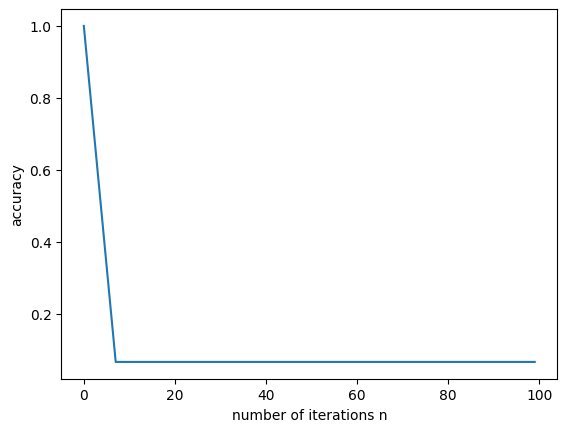

In [180]:
# Define the gradient of the function
def gradient(x):
  b = np.array([4.5, 6])
  return (x - b) / np.linalg.norm(x - b, ord=2)

# Beginning from subtask 5, we have a new gradient
def gradient_2(x):
  b = np.array([4.5, 6])
  return 2 * (x - b)

# Define the accuracy calculation
def accuracy(x, x_star):
  return np.linalg.norm(x_star - x, ord=2) / np.linalg.norm(x_star, ord=2)

# Define the generation of x_k+1
def new_x_gen(x, alpha):
  return x - alpha * gradient(x)

# Define the generation of x_k+1 for subtask 5 and later
def new_x_gen_2(x, alpha):
  return x - alpha * gradient_2(x)

# Define the function
b = np.array([4.5, 6])
f_1 = lambda x : np.linalg.norm(x - b, ord=2)

# Find the minimizer using scipy
initial_guess = np.array([0, 0])
opt_result = minimize(f_1, initial_guess, method='BFGS')
x_star = opt_result.x
print("optimal x:", x_star)

# Define the number of loops
n = np.linspace(0, 99, 100)

# Define the x array
x_2 = np.array([[0, 0]])
accu_2 = np.zeros([n.shape[0], 1])

for i in range(0, n.shape[0]):
  nwe_x_2 = new_x_gen(x_2[i, :], 1)
  x_2 = np.append(x_2, [nwe_x_2], axis=0)
  accu_2[i] = accuracy(x_2[i, :], x_star)
  if accu_2[i, :] <= 0.01:
    print(i)
    break

print("final accuracy:", min(accu_2))
plt.plot(n, accu_2)
plt.xlabel("number of iterations n")
plt.ylabel("accuracy")
plt.show()

From the plot we can see that after few iterations, the accuracy stops decaying, which means the newly generated $\mathbf{x}^{k+1}$ starts to oscillate around the optimal $\mathbf{x}^*$

### 3

final accuracy: [0.20000001]


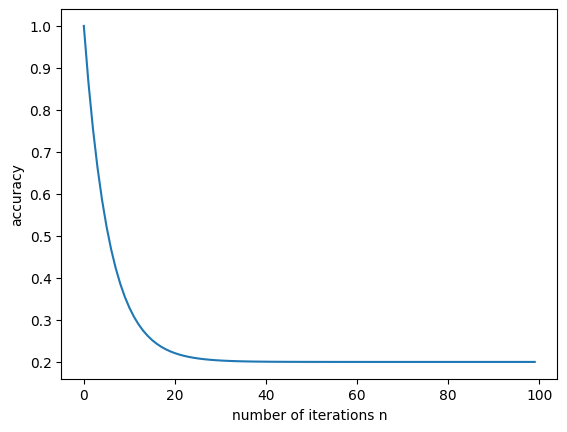

In [181]:
# Define the x array
x_3 = np.array([[0, 0]])
accu_3 = np.zeros([n.shape[0], 1])

for i in range(0, n.shape[0]):
  nwe_x_3 = new_x_gen(x_3[i, :], (5/6)**i)
  x_3 = np.append(x_3, [nwe_x_3], axis=0)
  accu_3[i] = accuracy(x_3[i, :], x_star)
  if accu_3[i, :] <= 0.01:
    break

print("final accuracy:", min(accu_3))

plt.plot(n, accu_3)
plt.xlabel("number of iterations n")
plt.ylabel("accuracy")
plt.show()

The same happens here, $\mathbf{x}^{k+1}$ oscillates around the optimal $\mathbf{x}^*$ and never converge to the optimal

### 4

number of iterations = 942


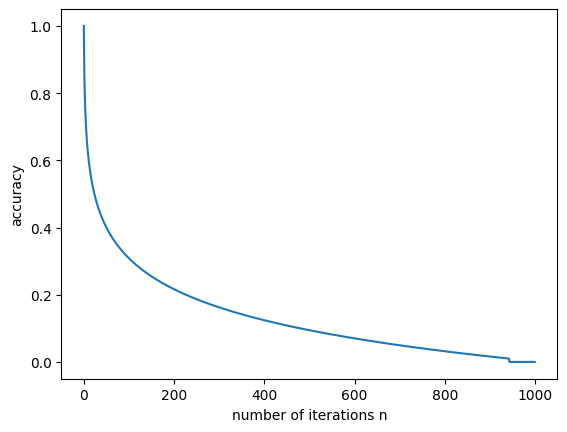

In [176]:
# Define the x array
n_4 = np.linspace(0, 999, 1000)
x_4 = np.array([[0, 0]])
accu_4 = np.zeros([n_4.shape[0], 1])

for i in range(0, n_4.shape[0]):
  nwe_x_4 = new_x_gen(x_4[i, :], 1/(i+1))
  x_4 = np.append(x_4, [nwe_x_4], axis=0)
  accu_4[i] = accuracy(x_4[i, :], x_star)
  if accu_4[i, :] <= 0.01:
    print("number of iterations =",i)
    break

plt.plot(n_4, accu_4)
plt.xlabel("number of iterations n")
plt.ylabel("accuracy")
plt.show()

We see that after 942 iterations the required accuracy is satisfied.

### 5

optimal solution: [4.4999963  6.00000296]
number of iterations = 21


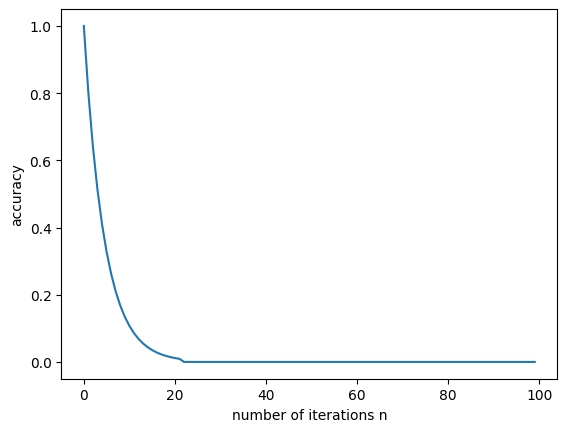

In [177]:
f_2 = lambda x : (np.linalg.norm(x - b, ord=2)) ** 2

# Find the minimizer using scipy
initial_guess = np.array([0, 0])
opt_result_2 = minimize(f_2, initial_guess, method='BFGS')
x_star_2 = opt_result_2.x
print("optimal solution:", x_star_2)

# Define the number of loops
n = np.linspace(0, 99, 100)

# Define the x array
x_5 = np.array([[0, 0]])
accu_5 = np.zeros([n.shape[0], 1])

for i in range(0, n.shape[0]):
  nwe_x_5 = new_x_gen_2(x_5[i, :], 0.1)
  x_5 = np.append(x_5, [nwe_x_5], axis=0)
  accu_5[i] = accuracy(x_5[i, :], x_star_2)
  if accu_5[i, :] <= 0.01:
    print("number of iterations =", i)
    break

plt.plot(n, accu_5)
plt.xlabel("number of iterations n")
plt.ylabel("accuracy")
plt.show()

With given $g(\mathbf{x})$ and $\alpha_k = 0.1$, the gradient descent converges to the optimal after 21 iterations

### 6

final accuracy: [0.62264482]


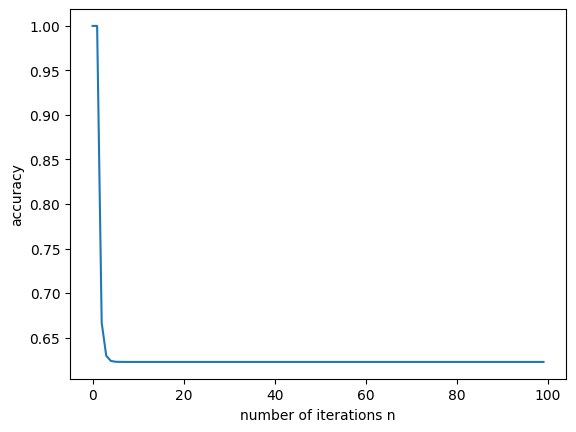

In [182]:
x_6 = np.array([[0, 0]])
accu_6 = np.zeros([n.shape[0], 1])

for i in range(0, n.shape[0]):
  nwe_x_6 = new_x_gen_2(x_6[i, :], (1/6)**i)
  x_6 = np.append(x_6, [nwe_x_6], axis=0)
  accu_6[i] = accuracy(x_6[i, :], x_star_2)
  if accu_6[i, :] <= 0.01:
    print("number of iterations =", i)
    break

print("final accuracy:", min(accu_6))

plt.plot(n, accu_6)
plt.xlabel("number of iterations n")
plt.ylabel("accuracy")
plt.show()

As shown, with this choice of stepsize, gradient descent will never converge to optimal

### 7

number of iterations = 3183


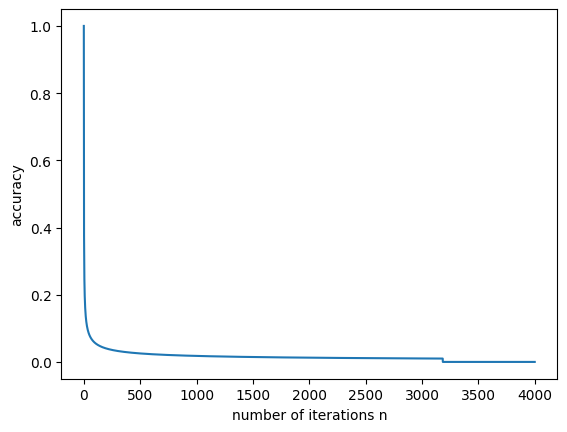

In [179]:
n = np.linspace(0, 3999, 4000)

x_7 = np.array([[0, 0]])
accu_7 = np.zeros([n.shape[0], 1])

for i in range(0, n.shape[0]):
  nwe_x_7 = new_x_gen_2(x_7[i, :], (1/(4*(i+1))))
  x_7 = np.append(x_7, [nwe_x_7], axis=0)
  accu_7[i] = accuracy(x_7[i, :], x_star_2)
  if accu_7[i, :] <= 0.01:
    print("number of iterations =", i)
    break

plt.plot(n, accu_7)
plt.xlabel("number of iterations n")
plt.ylabel("accuracy")
plt.show()